# 유방암 분류

In [1]:
## 필요모듈 import
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
## 데이터 로드
data = load_breast_cancer()

## 지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.

1. Feature Data 지정하기  
2. Label Data 지정하기  
3. Target Names 출력해 보기  
4. 데이터 Describe 해 보기  

In [3]:
##데이터 DESCRIPTION 
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
##편리한 처리를 위해 DataFrame으로 변환
import pandas as pd
df = pd.concat([pd.DataFrame(data.data, columns=data.feature_names), pd.DataFrame(data.target, columns=['target'])], axis=1)


In [5]:
##결측치 제거 
df = df.dropna().reset_index(drop=True)

['malignant' 'benign']
데이터의 갯수는 569개 입니다.

데이터의 label분포는 
 1    357
0    212
Name: target, dtype: int64 입니다.



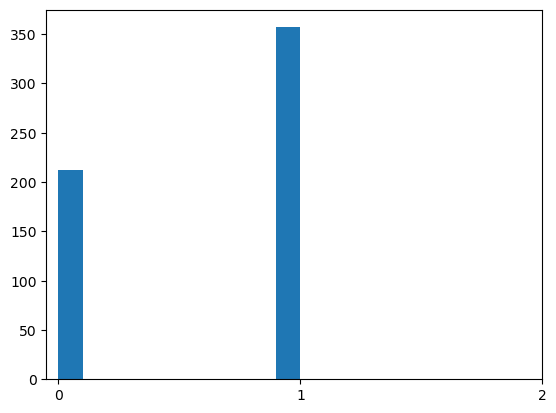

In [6]:
## print(data count)
print(data.target_names)
print(f"데이터의 갯수는 {len(df)}개 입니다.\n")

## print(label count)
print(f"데이터의 label분포는 \n {df['target'].value_counts()} 입니다.\n")

plt.hist(df['target'])
plt.xticks([0,1,2])
plt.show()

<AxesSubplot:>

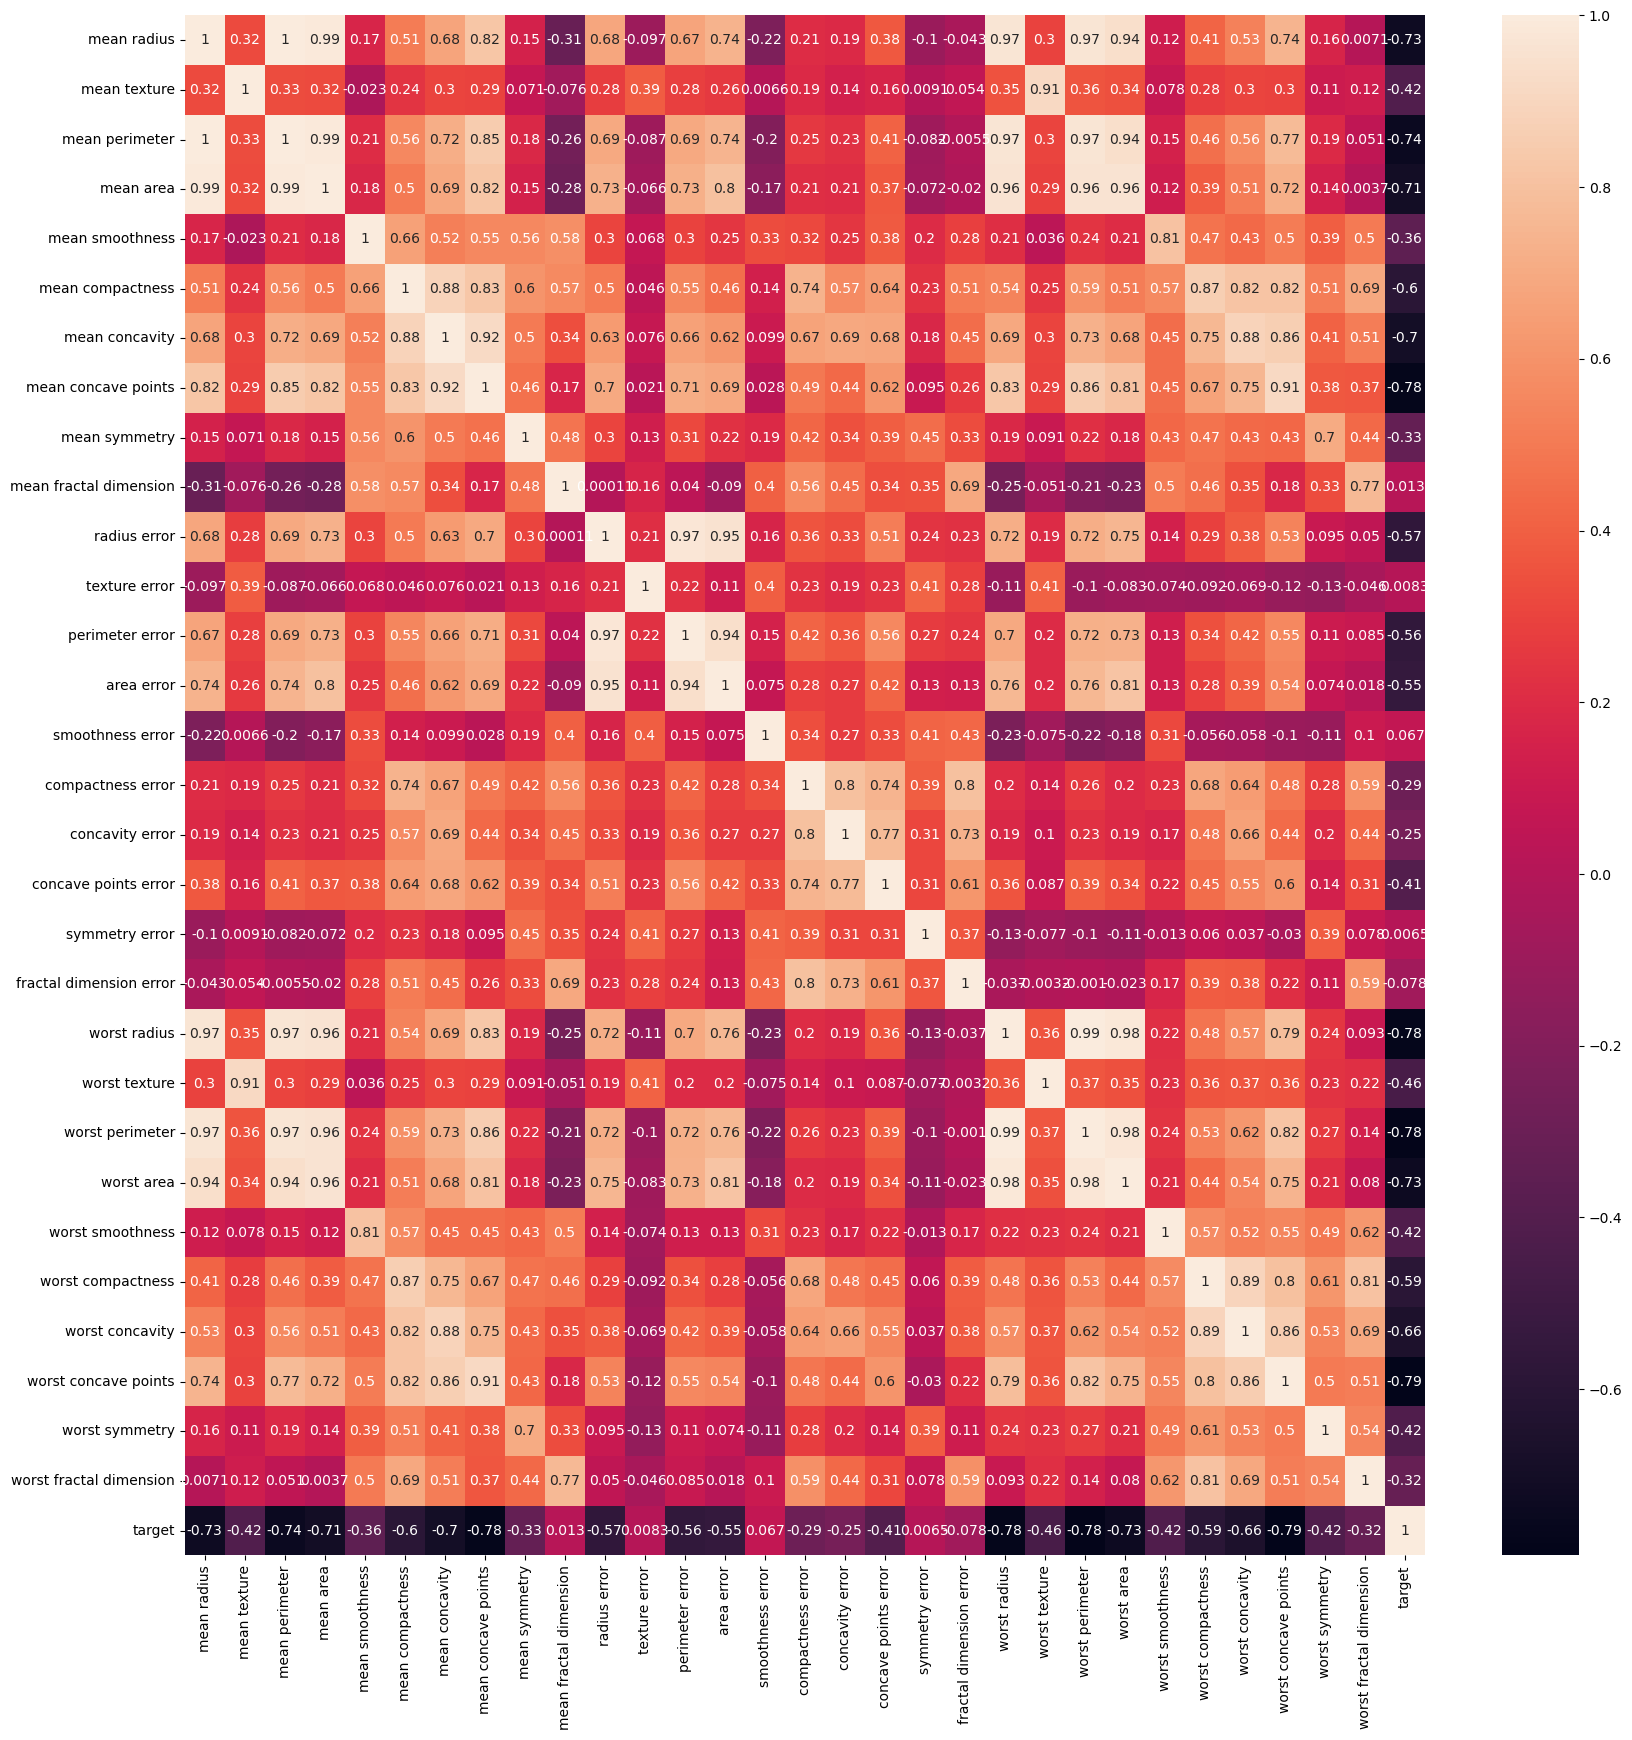

In [7]:
## 상관관계 분석 Heatmap 시작화 Target 변수와의 상관관계 다중공선
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [8]:
## Target과 관련이 높은 featrue 확인
df.corr()['target'].sort_values(ascending=False)

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

In [9]:
## VIF 공분산성 확인해보기
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as  pd 
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(
    df.iloc[:,:-1].values, i) for i in range(df.iloc[:,:-1].shape[1])]
vif["features"] = df.iloc[:,:-1].columns
vif.sort_values(by='VIF_Factor', ascending=True)

,VIF_Factor,features
11,24.675367,texture error
14,26.170243,smoothness error
19,27.532631,fractal dimension error
16,33.244099,concavity error
18,37.176452,symmetry error
15,44.919651,compactness error
17,53.698656,concave points error
13,72.466468,area error
26,86.310362,worst concavity
25,132.884276,worst compactness


In [10]:
###train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['target'], test_size=0.2, random_state=7)

In [11]:
##데이터 정규화 해보기 
from sklearn.preprocessing import RobustScaler

def get_values(value):
    return value.values.reshape(-1, 1)

for col in X_train.columns:
    scaler = RobustScaler()
    X_train[col] = scaler.fit_transform(get_values(X_train[col]))
    X_test[col] = scaler.transform(get_values(X_test[col]))

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression

In [13]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.99      1.00      0.99        74

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [14]:
model = SVC()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       0.96      1.00      0.98        74

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [20]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        40
           1       0.92      0.96      0.94        74

    accuracy                           0.92       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



In [16]:
model = SGDClassifier()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        40
           1       0.97      0.99      0.98        74

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [17]:
model = LogisticRegression(solver='lbfgs', max_iter=3000)
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.97      1.00      0.99        74

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



In [18]:
## classificaiton_report를 통해 각 모델의 성능을 확인해 보았습니다.그 이유는 multi class task에서 F1, accuracy , recall, precision을 한번에 확인하기 편해서 입니다.
## test성능이 충분하다고 판단 결과 분석을 통한 개선점을 찾을 필요는 없는거 같아서 Tree Model의 Feature importance를 통해 어떤 feature가 중요한지 확인할 수 있음으로 시각화를 진행보겠습니다.

In [54]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.97      1.00      0.99        74

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



<AxesSubplot:>

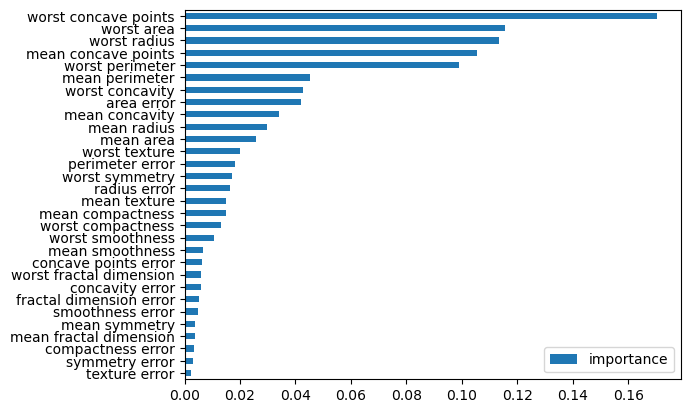

In [62]:
pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values(by='importance', ascending=True).plot(kind='barh')

<AxesSubplot:>

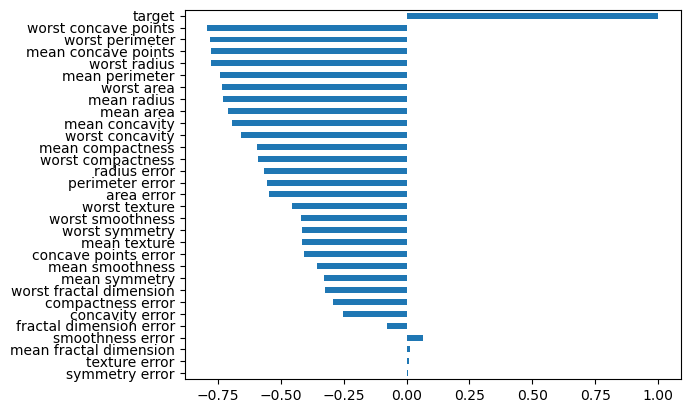

In [64]:
df.corr()['target'].sort_values(ascending=True,key=abs).plot(kind='barh')

In [33]:
## importances를 통해 확인한 결과와 corr을 통해 확인한 결과가 비슷하게 나왔습니다. tree가 학습을 잘한 거 같습니다.
## xai의 대세인 shap도 확인해 보겠습니다.
import shap 

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

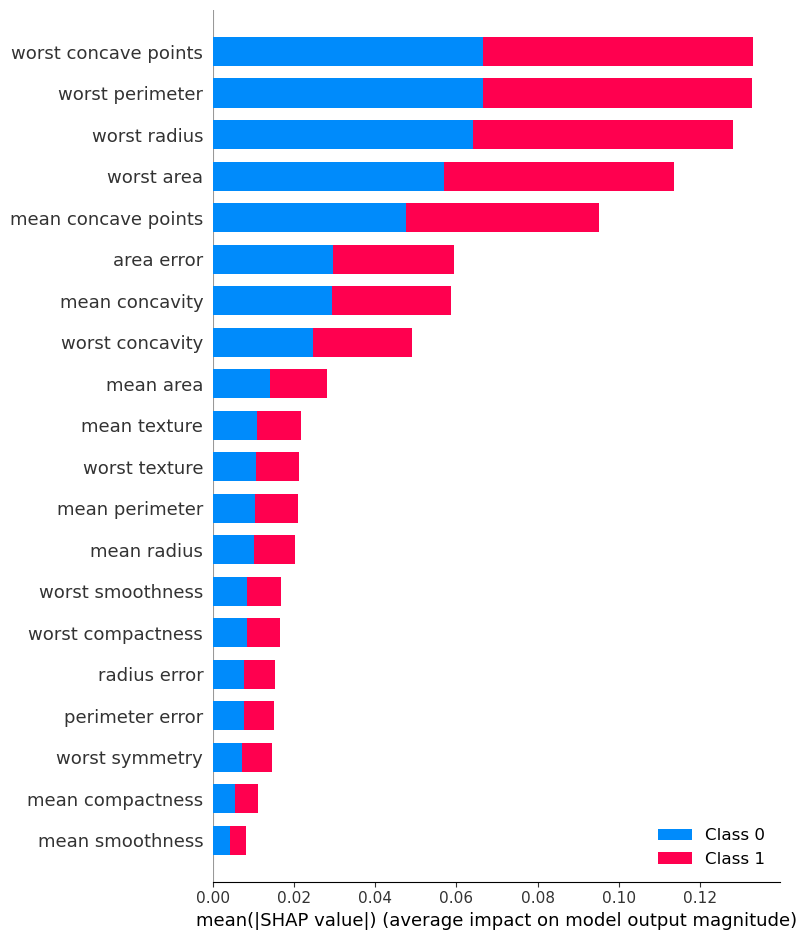

In [51]:
shap.initjs()
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
##샤프도 마찬가지로 비슷한 결과가 나왔습니다. 모델이 데이터를 잘 학습한 거 같습니다.